In [1]:
%matplotlib inline
import tensorflow as tf
import keras
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Dropout

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('x_train.shape: ',x_train.shape)
print('y_train.shape: ',y_train.shape)
print('x_test.shape: ',x_test.shape)
print('y_test.shape: ',y_test.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000, 1)


In [4]:
print([x_train[0]])

[array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]

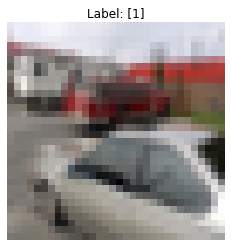

In [5]:
plt.imshow(x_train[49999], cmap='binary')
plt.title('Label: '+ str(y_train[49999]))
plt.axis('off')
plt.show()

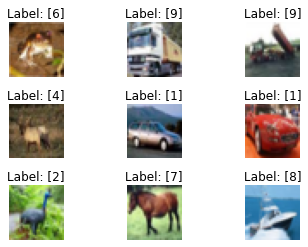

In [6]:
sub_plot= 330
for i in range(0, 9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(x_train[i], cmap="binary")
    ax.set_title("Label: " + str(y_train[i]))
    ax.axis("off")

plt.subplots_adjust(hspace = .5)

plt.show()

In [7]:
#ˋ正規化
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [8]:
# One-hot encoding編碼
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

/Users/chenzhenwei/Pictures/2022-07-14 .png

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
         input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same',
          activation='relu'))#不需要input
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

2022-07-14 22:09:49.659250: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-14 22:09:49.659759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)  

In [10]:
#編譯模型
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])#optimizer最佳化, 準確度metrics

In [11]:
#訓練模型
history = model.fit(x_train, y_train, validation_split=0.2, 
                    epochs=10, batch_size=128, verbose=2)

Epoch 1/10


2022-07-14 22:09:56.588021: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-14 22:09:56.834591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-14 22:10:03.324687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 7s - loss: 1.6548 - accuracy: 0.3980 - val_loss: 1.3614 - val_accuracy: 0.5234 - 7s/epoch - 24ms/step
Epoch 2/10
313/313 - 4s - loss: 1.2882 - accuracy: 0.5420 - val_loss: 1.1704 - val_accuracy: 0.6002 - 4s/epoch - 14ms/step
Epoch 3/10
313/313 - 4s - loss: 1.1363 - accuracy: 0.5927 - val_loss: 1.0352 - val_accuracy: 0.6417 - 4s/epoch - 14ms/step
Epoch 4/10
313/313 - 4s - loss: 1.0410 - accuracy: 0.6307 - val_loss: 0.9764 - val_accuracy: 0.6630 - 4s/epoch - 14ms/step
Epoch 5/10
313/313 - 4s - loss: 0.9729 - accuracy: 0.6559 - val_loss: 0.9397 - val_accuracy: 0.6778 - 4s/epoch - 14ms/step
Epoch 6/10
313/313 - 4s - loss: 0.9161 - accuracy: 0.6756 - val_loss: 0.8990 - val_accuracy: 0.6871 - 4s/epoch - 14ms/step
Epoch 7/10
313/313 - 4s - loss: 0.8664 - accuracy: 0.6914 - val_loss: 0.8613 - val_accuracy: 0.7018 - 4s/epoch - 14ms/step
Epoch 8/10
313/313 - 5s - loss: 0.8219 - accuracy: 0.7100 - val_loss: 0.8470 - val_accuracy: 0.7079 - 5s/epoch - 14ms/step
Epoch 9/10
313/313 - 5s - l

In [12]:
#評估模型
print('\nTesting ...')
loss, accuracy = model.evaluate(x_train, y_train)
print('訓練資料集的準確度= {:.2f}'.format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test)
print('測試資料集的準確度= {:.2f}'.format(accuracy))
print('Saving Model: cifar10.h5 ...')
model.save('./data/cifar10.h5')#儲存模型


Testing ...
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6589 - accuracy: 0.7722
訓練資料集的準確度= 0.77
313/313 [==============================] - 2s 6ms/step - loss: 0.8559 - accuracy: 0.7037
測試資料集的準確度= 0.70
Saving Model: cifar10.h5 ...


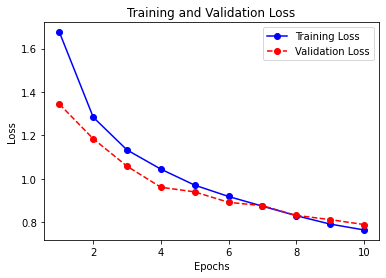

In [24]:
#顯示訓練和驗證損失
loss = history.history['loss']
epochs = range(1, len(loss)+1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, "bo-", label='Training Loss')
plt.plot(epochs, val_loss, "ro--", label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

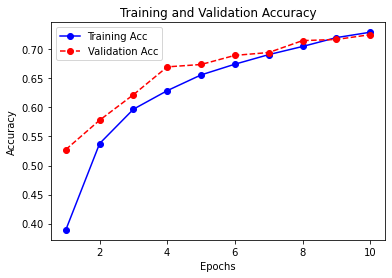

In [25]:
#顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()